<a href="https://colab.research.google.com/github/robert-pineau/CIND-820-Capstone/blob/main/cind820_rpineau_module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import sys
from google.colab import drive
import pandas as pd 
import numpy as np 
import plotly
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Mounting google colab, this will prompt first time each session.
drive.mount('/content/drive',force_remount=True)
dataset_file = "/content/drive/My Drive/Colab Notebooks/heart_statlog_cleveland_hungary_final.csv"
df=pd.read_csv(dataset_file,sep=',')
df.head(3)

Mounted at /content/drive


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [3]:
#Rename the columns to be nicer, no spaces.
df=df.rename(columns={"age": "Age", "sex": "Sex", "chest pain type": "ChestPainType", "resting bp s": "RestingBP_s",})
df=df.rename(columns={"cholesterol":"Cholesterol","fasting blood sugar": "FastingBloodSugar"})
df=df.rename(columns={"chest pain type": "ChestPainType", "resting bp s": "RestingBP_s", "fasting blood sugar": "FastingBloodSugar"})
df=df.rename(columns={"resting ecg": "RestingECG", "max heart rate": "MaxHeartRate", "exercise angina": "ExerciseAngina"})
df=df.rename(columns={"oldpeak":"OldPeak", "ST slope": "ST_Slope", "target": "Target"})

df.head(3)

,Age,Sex,ChestPainType,RestingBP_s,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,OldPeak,ST_Slope,Target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [4]:
#Check data types.
print(df.dtypes)

Age                    int64
Sex                    int64
ChestPainType          int64
RestingBP_s            int64
Cholesterol            int64
FastingBloodSugar      int64
RestingECG             int64
MaxHeartRate           int64
ExerciseAngina         int64
OldPeak              float64
ST_Slope               int64
Target                 int64
dtype: object


In [5]:
#Datatypes, counts, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1190 non-null   int64  
 1   Sex                1190 non-null   int64  
 2   ChestPainType      1190 non-null   int64  
 3   RestingBP_s        1190 non-null   int64  
 4   Cholesterol        1190 non-null   int64  
 5   FastingBloodSugar  1190 non-null   int64  
 6   RestingECG         1190 non-null   int64  
 7   MaxHeartRate       1190 non-null   int64  
 8   ExerciseAngina     1190 non-null   int64  
 9   OldPeak            1190 non-null   float64
 10  ST_Slope           1190 non-null   int64  
 11  Target             1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
#Check for NULL or missing entries. (none)
print(df.isna().any())
print("\n\n")
print(df.isnull().any())

Age                  False
Sex                  False
ChestPainType        False
RestingBP_s          False
Cholesterol          False
FastingBloodSugar    False
RestingECG           False
MaxHeartRate         False
ExerciseAngina       False
OldPeak              False
ST_Slope             False
Target               False
dtype: bool



Age                  False
Sex                  False
ChestPainType        False
RestingBP_s          False
Cholesterol          False
FastingBloodSugar    False
RestingECG           False
MaxHeartRate         False
ExerciseAngina       False
OldPeak              False
ST_Slope             False
Target               False
dtype: bool


In [7]:
#Basic Statistics of the dataset.(Measures of Center/Central Tendency, and Measures of Variability)
df.describe()

,Age,Sex,ChestPainType,RestingBP_s,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,OldPeak,ST_Slope,Target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
#Check for outliers on numeric attributes
#Using for outlier detection mean +/- 3*ST-DEV approach.
#
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
  mean = df[col].mean()
  stdev3 = 3*df[col].std()
  these_outliers = df[(df[col] < mean - stdev3) | (df[col] > mean + stdev3)]
  if (these_outliers.shape[0] > 1):
    print(f"For attribute '{col}': There are {these_outliers.shape[0]} outliers:\n")
    print(these_outliers)
    print("\n\n")
  elif (these_outliers.shape[0] == 1):
    print(f"For attribute '{col}': There is {these_outliers.shape[0]} outlier:\n")
    print(these_outliers)
    print("\n\n")
  else:
    print(f"For attribute '{col}': There are no outliers.\n")


For attribute 'Age': There are no outliers.

For attribute 'RestingBP_s': There are 10 outliers:

      Age  Sex  ChestPainType  RestingBP_s  Cholesterol  FastingBloodSugar  \
109    39    1              2          190          241                  0   
242    54    1              4          200          198                  0   
366    64    0              4          200            0                  0   
400    61    1              3          200            0                  1   
450    55    1              3            0            0                  0   
593    61    1              4          190          287                  1   
734    56    0              4          200          288                  1   
761    54    1              2          192          283                  0   
1013   56    0              4          200          288                  1   
1075   54    1              2          192          283                  0   

      RestingECG  MaxHeartRate  ExerciseAng

In [10]:
#Check for out of bound entries(outliers) for nominal and binary attributes (including the class variable)
#Since all nominal and binary attributes have a valid contiguous integer range, ie 0-1, or 1-4, we dont need to look at each value for correctness,
#we only need to look for those outside the range.
valid_values = {'Sex': [0,1], 'ChestPainType': [1,2,3,4], 'FastingBloodSugar': [0,1], 'RestingECG': [0,1,2], 'ExerciseAngina':[0,1], 'ST_Slope': [1,2,3], 'Target': [0,1]}

for col in ('Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Target'):
  valid = np.array(valid_values[col])
  max_valid = valid.max()
  min_valid = valid.min()
  print(f"For attribute '{col}': Valid MAX: {max_valid}, Valid MIN: {min_valid}")
  these_outliers = df[((df[col] < min_valid) | (df[col] > max_valid))]

  if (these_outliers.shape[0] > 1):
    print(f"For attribute '{col}': There are {these_outliers.shape[0]} outliers:\n")
    print(these_outliers)
    print("\n\n")
  elif (these_outliers.shape[0] == 1):
    print(f"For attribute '{col}': There is {these_outliers.shape[0]} outlier:\n")
    print(these_outliers)
    print("\n\n")
  else:
    print(f"For attribute '{col}': There are no outliers.\n")

For attribute 'Sex': Valid MAX: 1, Valid MIN: 0
For attribute 'Sex': There are no outliers.

For attribute 'ChestPainType': Valid MAX: 4, Valid MIN: 1
For attribute 'ChestPainType': There are no outliers.

For attribute 'FastingBloodSugar': Valid MAX: 1, Valid MIN: 0
For attribute 'FastingBloodSugar': There are no outliers.

For attribute 'RestingECG': Valid MAX: 2, Valid MIN: 0
For attribute 'RestingECG': There are no outliers.

For attribute 'ExerciseAngina': Valid MAX: 1, Valid MIN: 0
For attribute 'ExerciseAngina': There are no outliers.

For attribute 'ST_Slope': Valid MAX: 3, Valid MIN: 1
For attribute 'ST_Slope': There is 1 outlier:

     Age  Sex  ChestPainType  RestingBP_s  Cholesterol  FastingBloodSugar  \
517   68    1              3          150          195                  1   

     RestingECG  MaxHeartRate  ExerciseAngina  OldPeak  ST_Slope  Target  
517           0           132               0      0.0         0       1  



For attribute 'Target': Valid MAX: 1, Valid

In [11]:
#From above, there is a problem with one entry regarding the ST_Slope attribute, it is zero, when all others are 1-3
#
#The documentation at https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive
#Shows a range of 0-2, but in the definition of the mapped nominal values it shows:
#
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping
#
print(df['ST_Slope'].value_counts().sort_index())
#
#
#Since there is only one entry out of range, making the assumption that the correct range is 1-3, and not 0-2, therefore the single entry with a value of 0 is out of bounds.
#
#Will simply drop this entry.
df = df[df['ST_Slope'] != 0]


0      1
1    526
2    582
3     81
Name: ST_Slope, dtype: int64


In [12]:
#Assigning descriptive labels for all possible values for all nominal/binary attributes.
#
labels = {'Sex': ['Female', 'Male'], 'ChestPainType': ['Typical Angina', 'A-Typical Angina', 'Non-Anginal Pain', 'Asymptomatic'], 
          'FastingBloodSugar': ['<= 120 mg/dl', '> 120 mg/dl'], 'RestingECG': ['Normal', 'ST-T Abnormality', 'Probable Left Ventricular Hypertrophy'],
          'ExerciseAngina':['No', 'Yes'], 'ST_Slope': ['Upsloping', 'Flat', 'Downsloping'], 'Target': ['Without Heart Disease', 'Has Heart Disease']}



In [13]:
#Creating subsets of the data for a series of interesting plots to help with visualization of the data.
#
#Breaking up the dataset into two groups, those with heart disease and those without.
with_heart_disease = df[df['Target'] == 1]
no_heart_disease = df[df['Target'] == 0]

#Breaking up the dataset into four groups, by Sex, and those with heart disease and those without.
with_heart_disease_male = df[(df['Target'] == 1) & (df['Sex'] == 1)]
with_heart_disease_female = df[(df['Target'] == 1) & (df['Sex'] == 0)]
no_heart_disease_male = df[(df['Target'] == 0) & (df['Sex'] == 1)]
no_heart_disease_female = df[(df['Target'] == 0) & (df['Sex'] == 0)]

#For these groups remove the "Sex" column from the data.
with_heart_disease_male = with_heart_disease_male.drop("Sex",axis=1)
with_heart_disease_female = with_heart_disease_female.drop("Sex",axis=1)
no_heart_disease_male = no_heart_disease_male.drop("Sex",axis=1)
no_heart_disease_female = no_heart_disease_female.drop("Sex",axis=1)

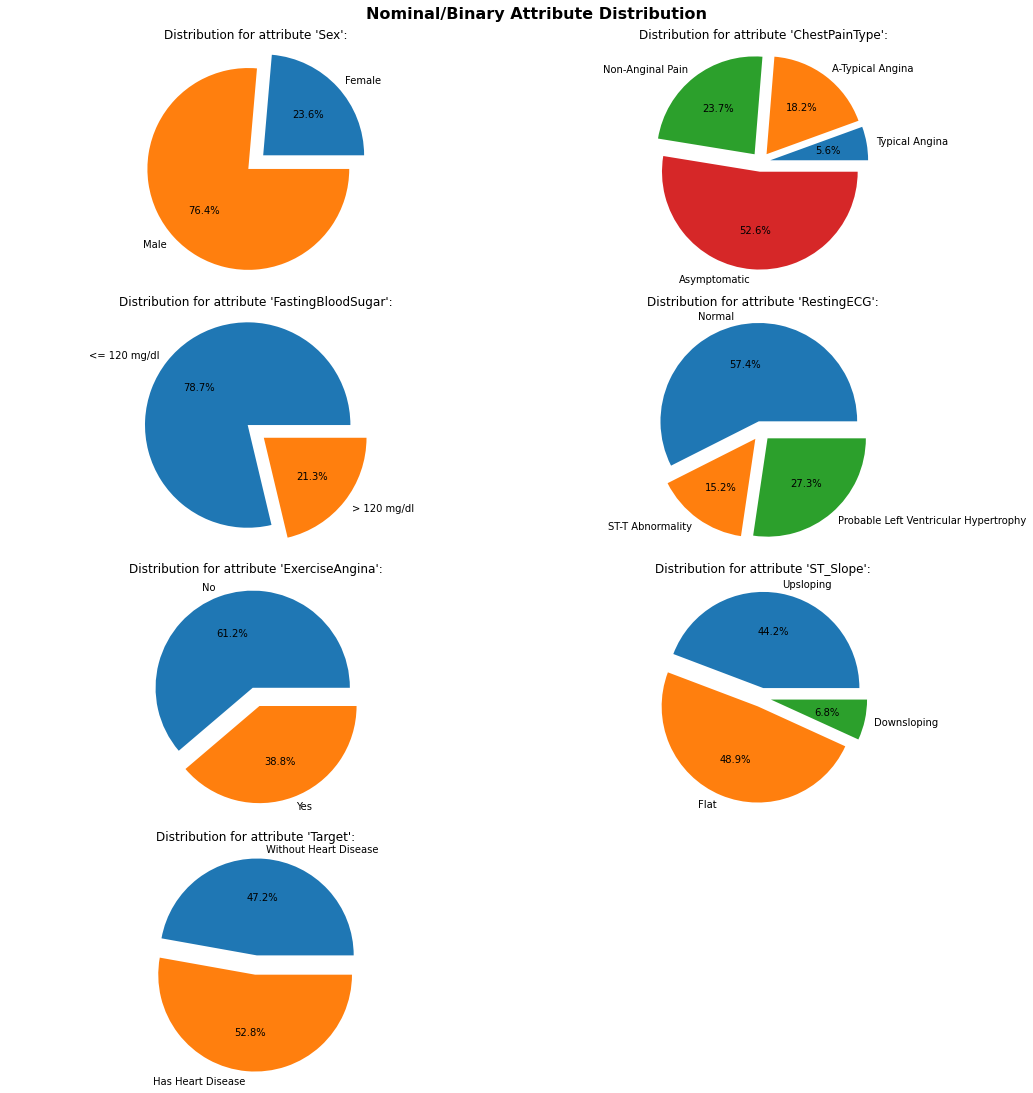

In [16]:
#Visualizing the distribution of the categorical attributes, including the class variable.
ax=1
plt.figure(figsize=(15,15))

for col in ('Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina','ST_Slope', 'Target'):
  plt.subplot(4,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}':")
  plt.pie(df[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  plt.axis('equal')
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("nominal_dist.pdf",dpi=1200, bbox_inches='tight')

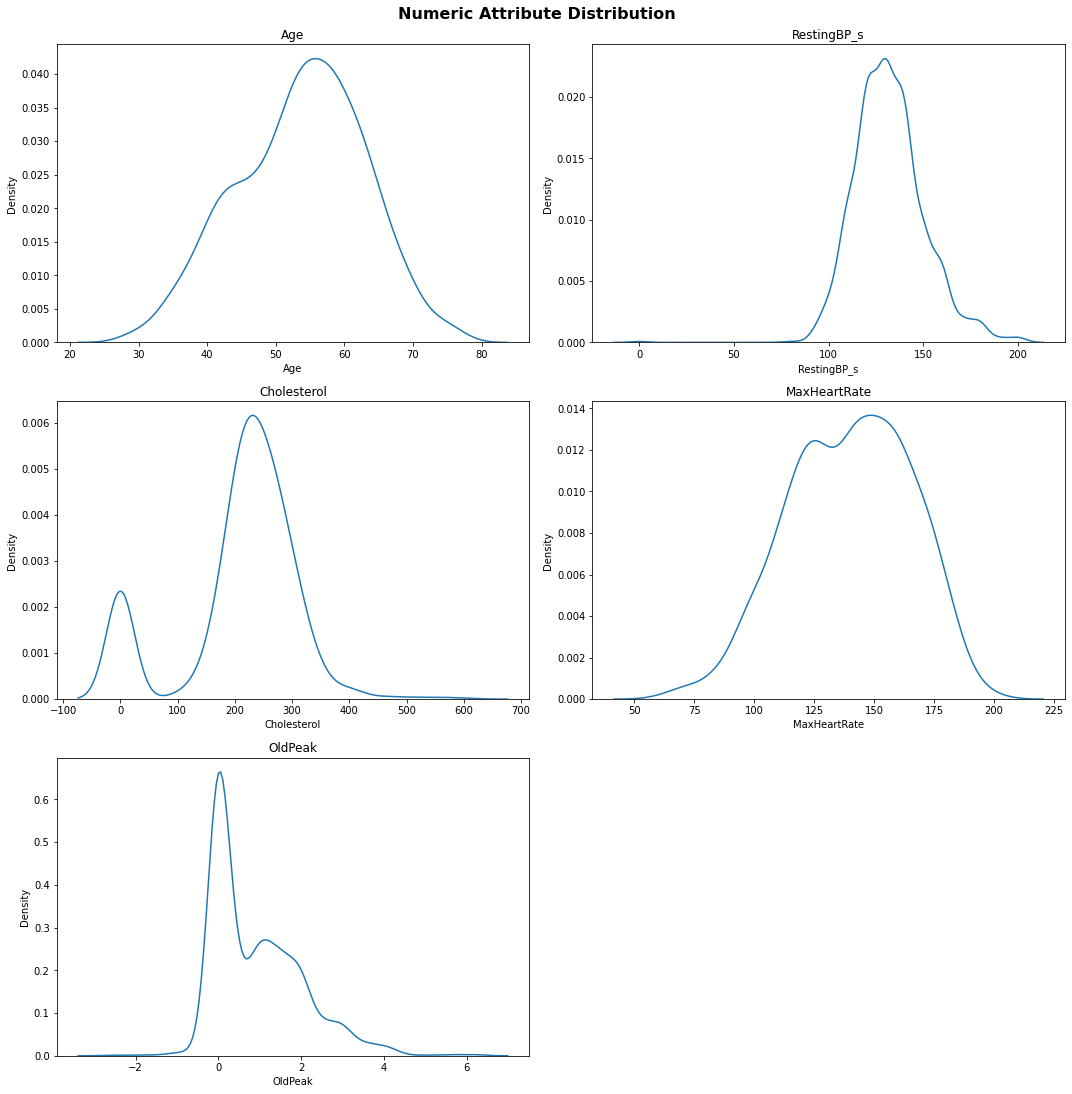

In [17]:
#Visualizing the overall distribution of the numeric attributes.
plt.figure(figsize=(15,15))

ax=1
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
    plt.subplot(3,2,ax)
    plt.title(col)
    sns.kdeplot(x=df[col])
    ax += 1

plt.suptitle('Numeric Attribute Distribution',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("numeric_dist.pdf",dpi=1200, bbox_inches='tight')

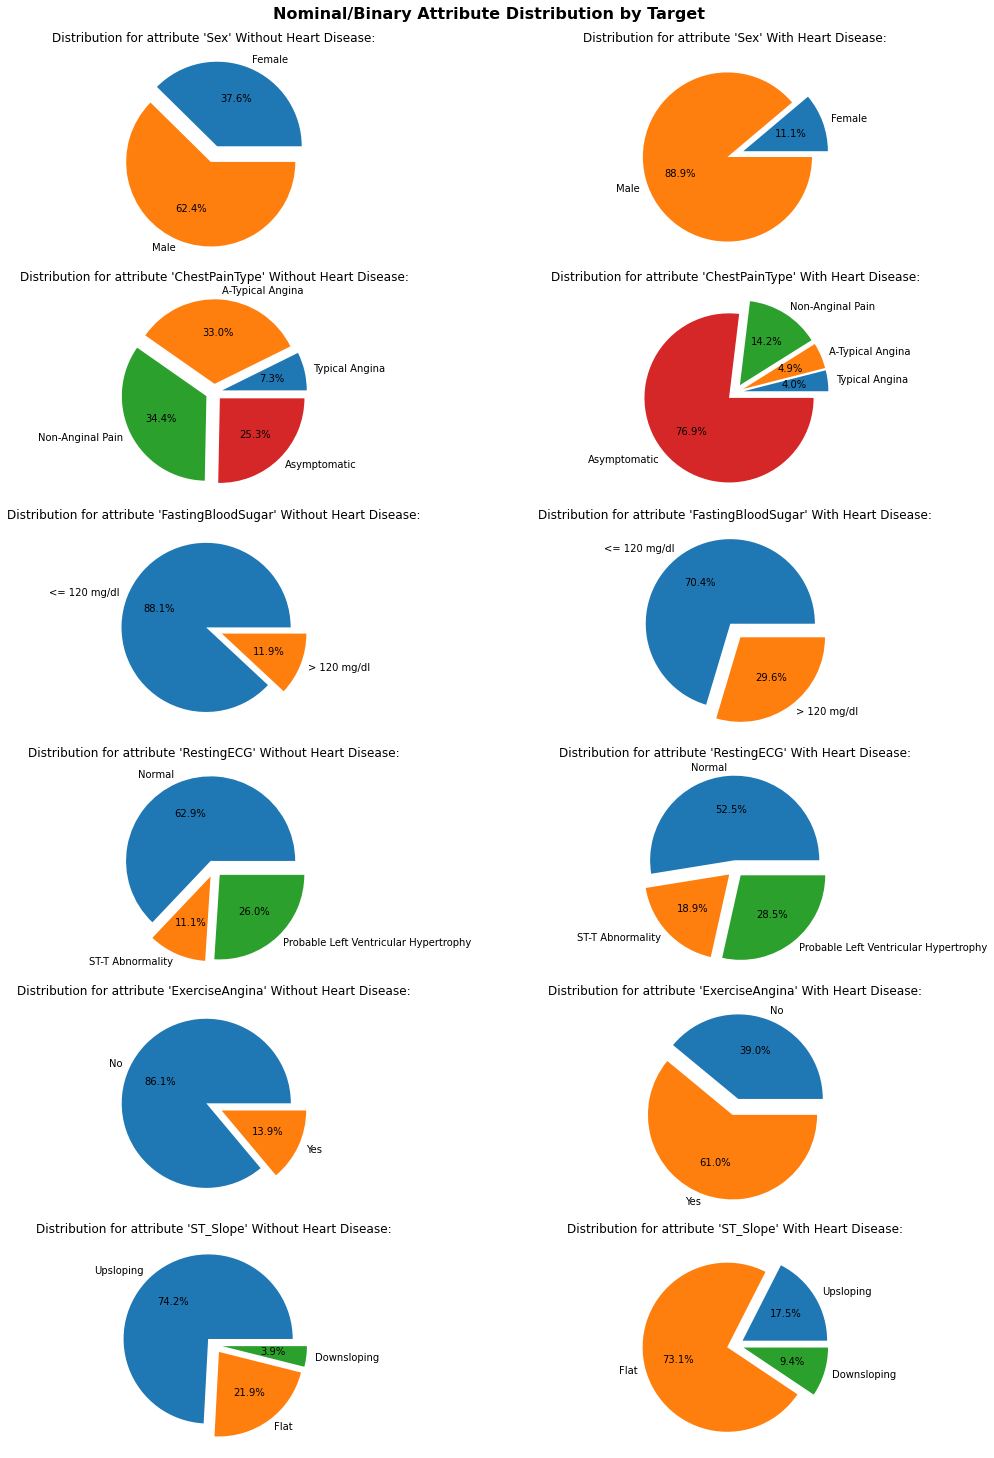

In [18]:
#Visualizing the distribution of the categorical attributes, by target
ax=1
plt.figure(figsize=(15,20))
plt.axis('equal')
  
for col in ('Sex','ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina','ST_Slope'):
  plt.subplot(6,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}' Without Heart Disease:")
  plt.pie(no_heart_disease[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1
  plt.subplot(6,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}' With Heart Disease:")
  plt.pie(with_heart_disease[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution by Target',y=1.01, size = 16, color = 'black', weight='bold')
plt.tight_layout()
plt.savefig("nominal_dist_by_target.pdf",dpi=1200, bbox_inches='tight')

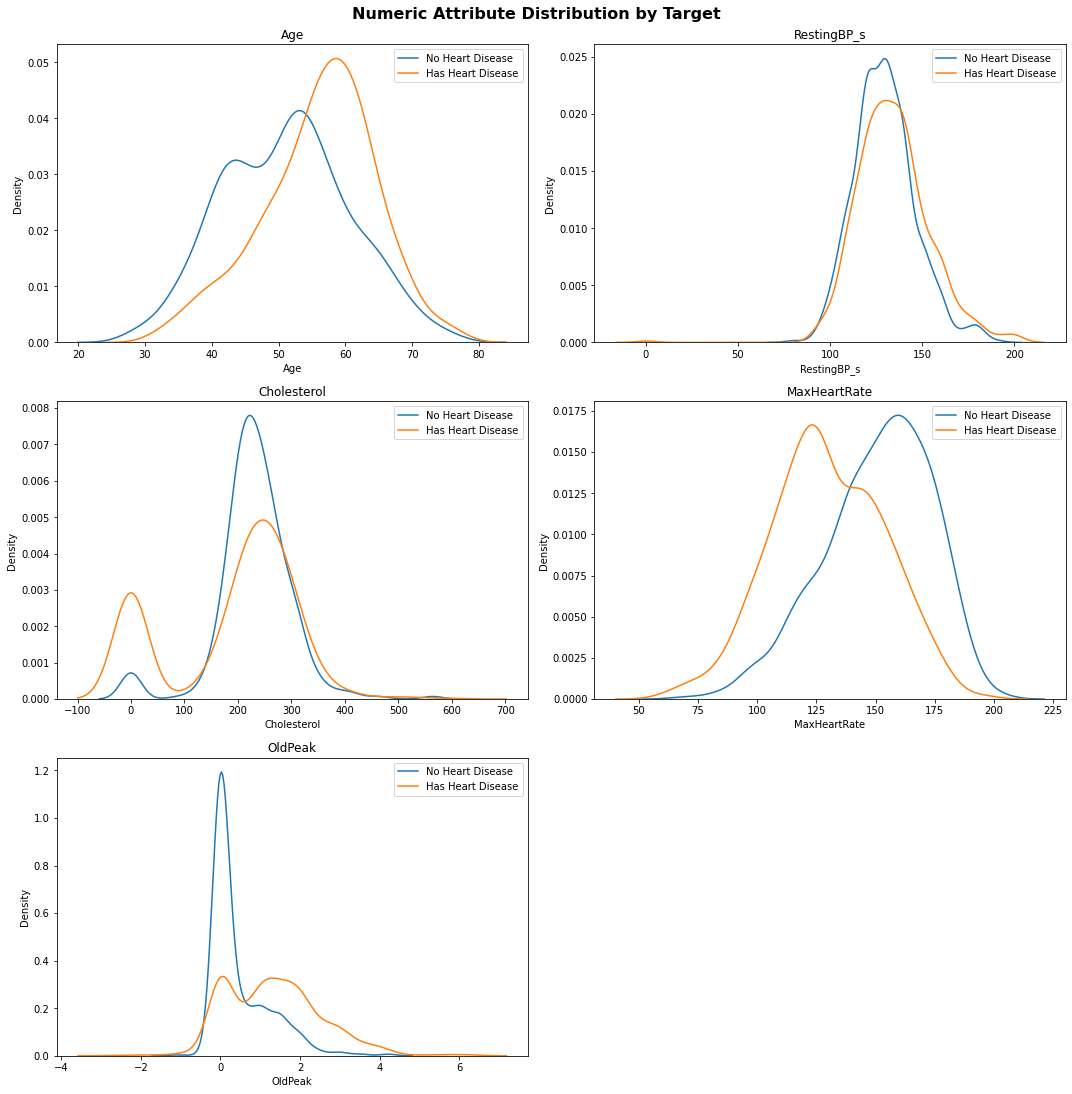

In [20]:
#Visualizing the distribution of the numeric attributes by Target:
plt.figure(figsize=(15,15))

ax=1
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
    plt.subplot(3,2,ax)
    plt.title(col)
    sns.kdeplot(x=no_heart_disease[col],label = "No Heart Disease")
    sns.kdeplot(x=with_heart_disease[col],label = "Has Heart Disease")
    plt.legend()
    ax += 1

plt.suptitle('Numeric Attribute Distribution by Target',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("numeric_dist_by_target.pdf",dpi=1200, bbox_inches='tight')

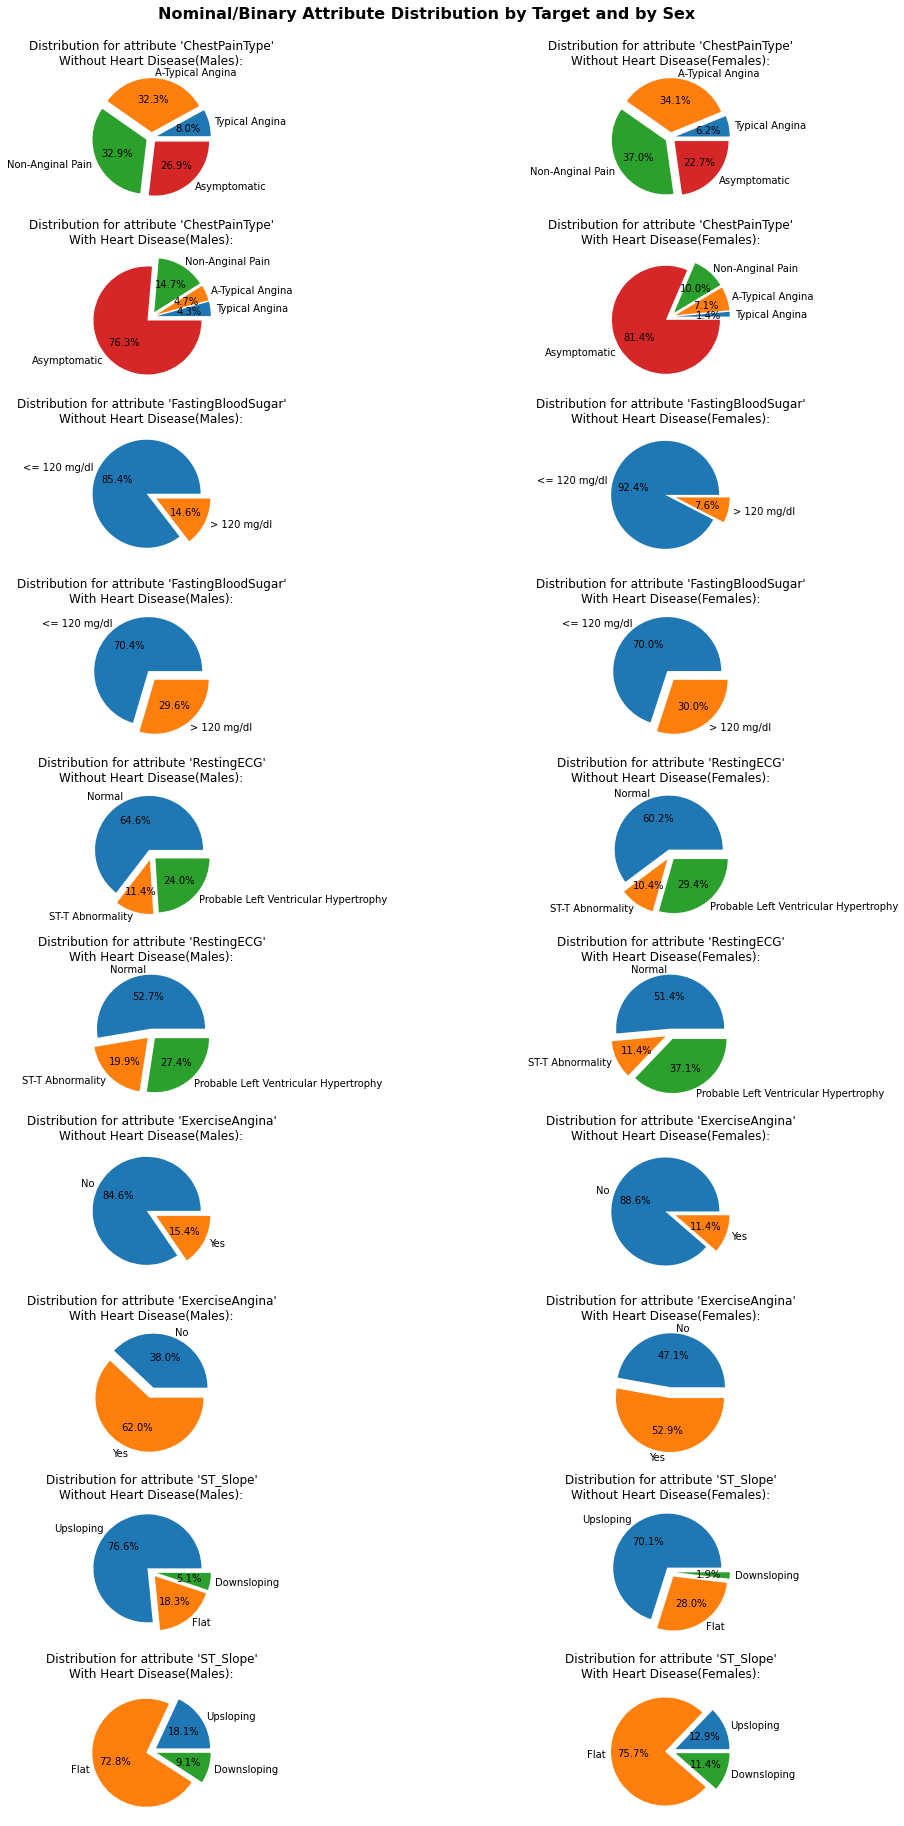

In [21]:
#Visualizing the distribution of the categorical attributes, by target and by sex
ax=1
plt.figure(figsize=(15,30))
plt.axis('equal')
  
for col in ('ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina','ST_Slope'):
  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWithout Heart Disease(Males):")
  plt.pie(no_heart_disease_male[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWithout Heart Disease(Females):")
  plt.pie(no_heart_disease_female[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWith Heart Disease(Males):")
  plt.pie(with_heart_disease_male[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWith Heart Disease(Females):")
  plt.pie(with_heart_disease_female[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution by Target and by Sex',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("nominal_dist_by_target_by_sex.pdf",dpi=1200, bbox_inches='tight')

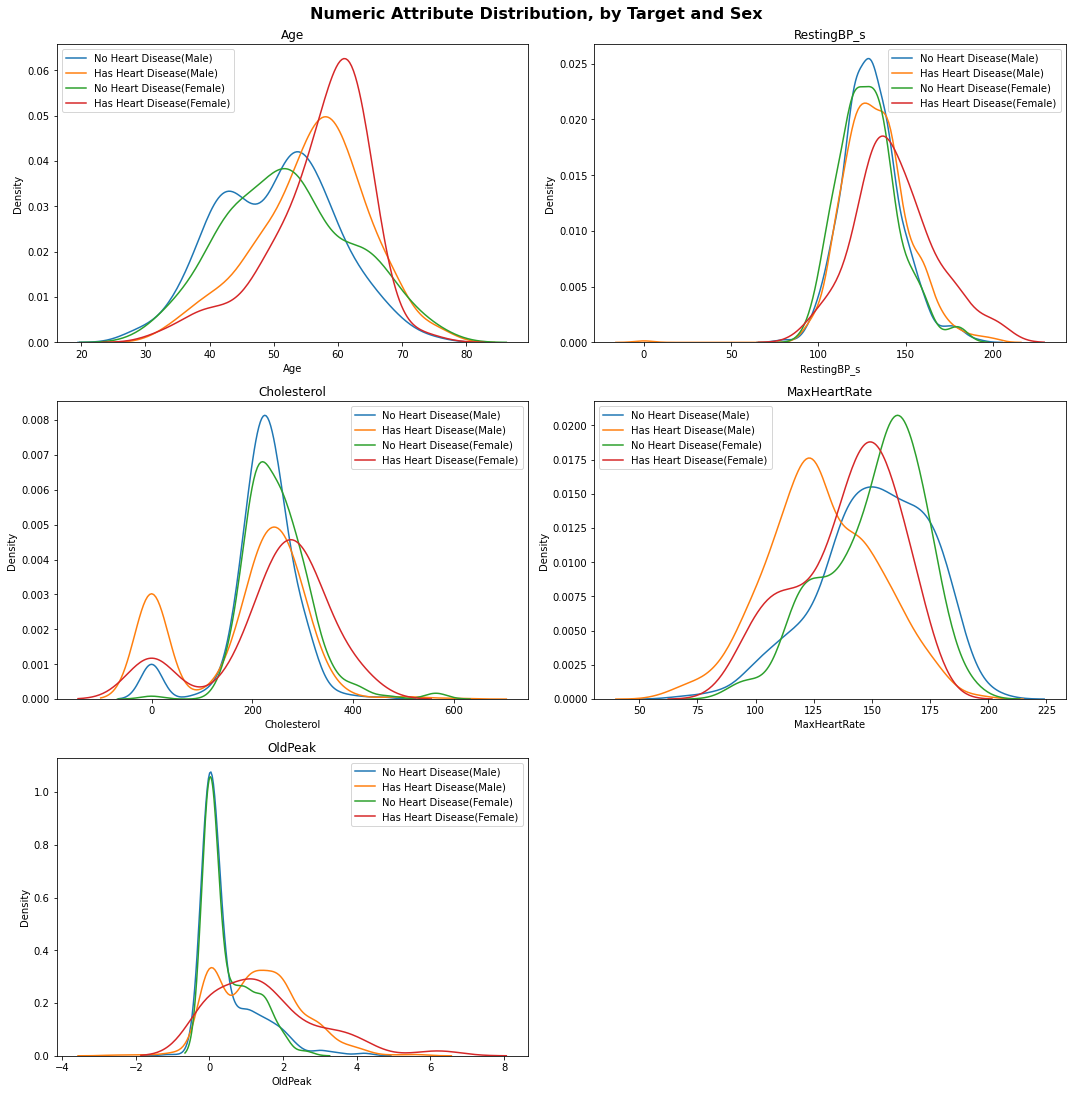

In [22]:
#Visualizing the distribution of the numerical attributes, by target and by sex
plt.figure(figsize=(15,15))

ax=1
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
    plt.subplot(3,2,ax)
    plt.title(col)
    sns.kdeplot(x=no_heart_disease_male[col],label = "No Heart Disease(Male)")
    sns.kdeplot(x=with_heart_disease_male[col],label = "Has Heart Disease(Male)")
    sns.kdeplot(x=no_heart_disease_female[col],label = "No Heart Disease(Female)")
    sns.kdeplot(x=with_heart_disease_female[col],label = "Has Heart Disease(Female)")
    plt.legend()
    ax += 1

plt.suptitle('Numeric Attribute Distribution, by Target and Sex',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("numeric_dist_by_target_by_sex.pdf",dpi=1200, bbox_inches='tight')